# Problem Set 2 MLE 2023

The following problem set will revolve around the faces dataset.


## Requirements

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. Build a logistic regression classifier to classify the faces by their tagged sex without a test-train split (10 pts).

2. Include test-train split and scaling methods to try improving model performance (15 pts).
   
3. Present results for 1 and 2 with confusion matrix plots. (5 pts).

4. Use upsampling to increase the training data for the female samples to 50% and show how performance changed. (10pts)


In [15]:
import numpy as np
import os
import cv2 as cv
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')

### Data Processing
In the first few steps, loading, tagging, and and formatting of the data is done. The **gender_list** variable is a manually tagged list of visually identifiable genders AAB. Any politically correctness issues with how these are identified is ignored for experimentation's sake.

In [16]:
sexes_list = list("mmmmmmmfmfmmmmmmmmmmmmmmmmmmmmmfmmfmmmmm")

Loop through directory, access each first image, flatten the 2D matrix onto a vector, and append to the **A** list, effectively creating a 2D matrix where each row is an image.

In [17]:
rootdir = "data/att_faces/"
X = []
for i in list(range(1,41)):
    img = cv.imread(f"data/att_faces/s{i}/1.pgm",0)
    X.append(img.flatten())

Show a sample image from the dataset

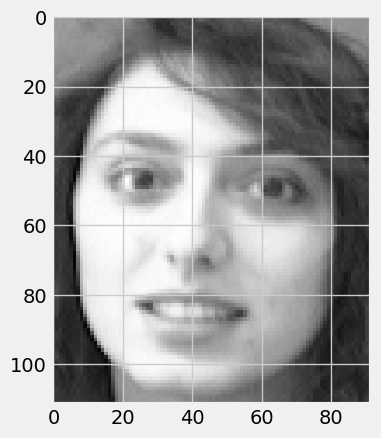

In [22]:
plt.imshow(X[7].reshape(112,92),cmap='gray')

Compute for the mean face to normalize dataset

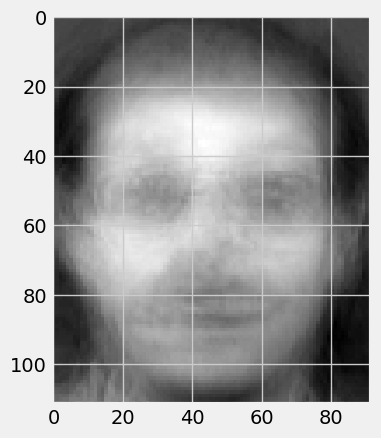

In [13]:
mean_face = np.mean(X, 0)
mf = mean_face.reshape(112,92)
plt.imshow(mf, cmap='gray')

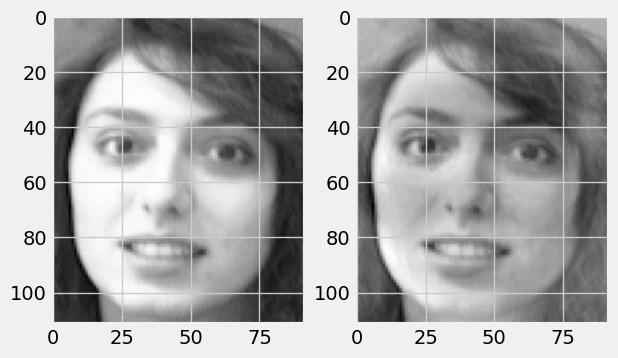

In [31]:
# Adjusted and centered A
A = X - mean_face
f1 = X[7].reshape(112,92)
f2 = A[7].reshape(112,92)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(f1, cmap='gray')
axarr[1].imshow(f2, cmap='gray')